In [1]:
import os
print("LD_LIBRARY_PATH =", os.environ.get("LD_LIBRARY_PATH"))

LD_LIBRARY_PATH = /home/dawon/miniconda3/lib:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/envs/tf_gpu_env/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib::/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/


In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2025-05-18 17:25:05.041881: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 17:25:05.085422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 17:25:05.565378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dawon/miniconda3/envs/tf_gpu_env/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normal

Num GPUs Available: 1


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 체크포인트 디렉토리 생성
os.makedirs("checkpoints", exist_ok=True)

# 데이터 증강 및 정규화
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# 학습용 데이터 생성기
train_generator = datagen.flow_from_directory(
    "./price_patterns",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# 검증용 데이터 생성기
validation_generator = datagen.flow_from_directory(
    "./price_patterns",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# CNN 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백: 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 콜백: 중간 저장
checkpoint = ModelCheckpoint(
    filepath="checkpoints/pattern_model_epoch{epoch:02d}_valacc{val_accuracy:.4f}.h5",
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

# 최종 모델 저장
model.save("pattern_classification_model.h5")
print("패턴 분류 모델 학습 완료 및 저장!")

Found 445619 images belonging to 2 classes.
Found 111404 images belonging to 2 classes.


2025-05-18 17:25:13.687662: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46448 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:17:00.0, compute capability: 8.9


Epoch 1/10


2025-05-18 17:25:14.387750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-05-18 17:25:16.364614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2025-05-18 17:25:17.382214: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-18 17:25:17.905766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-05-18 17:25:18.265767: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x2213a4c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 17:25:18.265795: I tensorflow/co

13926/13926 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.7418      

2025-05-18 18:05:15.715143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.80020, saving model to checkpoints/pattern_model_epoch01_valacc0.8002.h5
13926/13926 [==============================] - 3000s 215ms/step - loss: 0.5164 - accuracy: 0.7418 - val_loss: 0.4308 - val_accuracy: 0.8002
Epoch 2/10
13926/13926 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.8017   
Epoch 2: val_accuracy improved from 0.80020 to 0.81490, saving model to checkpoints/pattern_model_epoch02_valacc0.8149.h5
13926/13926 [==============================] - 3008s 216ms/step - loss: 0.4171 - accuracy: 0.8017 - val_loss: 0.3917 - val_accuracy: 0.8149
Epoch 3/10
13926/13926 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8134   
Epoch 3: val_accuracy improved from 0.81490 to 0.82072, saving model to checkpoints/pattern_model_epoch03_valacc0.8207.h5
13926/13926 [==============================] - 3009s 216ms/step - loss: 0.3926 - accuracy: 0.8134 - val_loss: 0.3707 - val_accuracy: 0.8207
Epoch 4/10

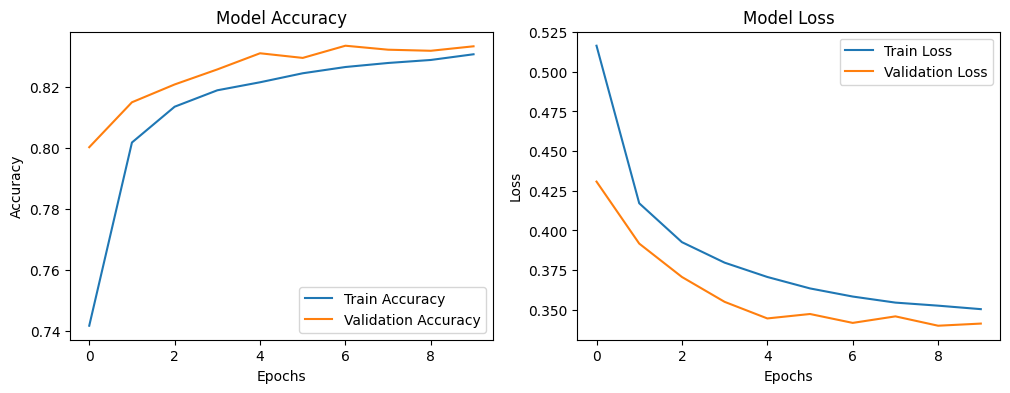

In [5]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실(loss) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
# 학습된 모델 불러오기
import tensorflow as tf

model = tf.keras.models.load_model("pattern_classification_model.h5")

# 모델 평가 (검증 데이터셋)
loss, accuracy = model.evaluate(validation_generator)

print(f"모델 평가 결과")
print(f"손실(loss): {loss:.4f}")
print(f"정확도(accuracy): {accuracy:.4f}")

2025-05-19 01:47:36.609863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3482/3482 [==============================] - 602s 173ms/step - loss: 0.3408 - accuracy: 0.8338
모델 평가 결과
손실(loss): 0.3408
정확도(accuracy): 0.8338


1/1 [==============================] - 0s 42ms/step


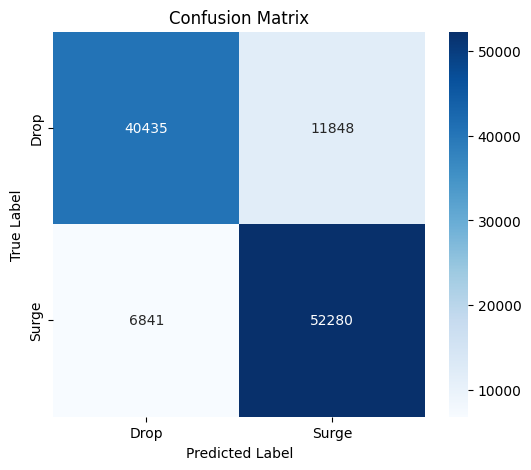

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 실제 레이블과 예측값 수집
true_labels = []
pred_labels = []

for _ in range(len(validation_generator)):
    x, y = validation_generator.__next__()
    preds = model.predict(x)
    true_labels.extend(y)  # 실제 정답
    pred_labels.extend((preds > 0.5).astype(int).flatten())  # 0.5 이상이면 상승(1), 아니면 하락(0)

# 혼동 행렬 생성
cm = confusion_matrix(true_labels, pred_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Drop', 'Surge'], yticklabels=['Drop', 'Surge'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


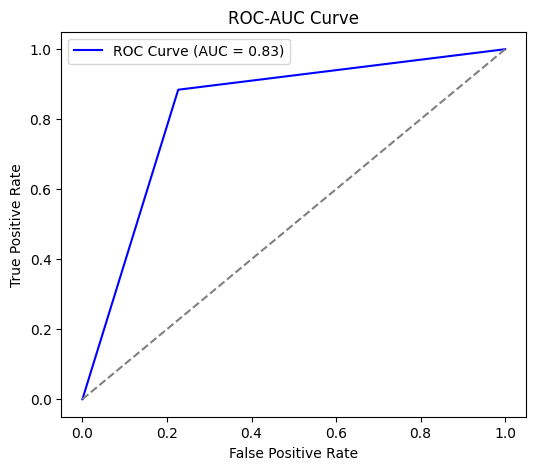

In [10]:
from sklearn.metrics import roc_curve, auc

# ROC Curve 계산
fpr, tpr, _ = roc_curve(true_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 랜덤 예측 기준선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
# 최근 1년 간 상승패턴 이미지 이용 테스트 (이게 테스트셋)

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (최근 1년 상승 패턴)
test_dir = "./data/price_1percent_surge_patterns_test"

# 테스트할 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정 (최적 속도를 위해 한 번에 여러 개 처리)
batch_size = 32
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행 (배치 단위)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy 배열 변환 (배치 입력)

    # 모델 예측
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] > 0.5 else 0
        fail += 1 if pred[0] <= 0.5 else 0
        predictions.append([img_name, result])

# 최종 성공 & 실패 개수 출력
print(f"success: {success}, fail: {fail}")

# CSV 파일로 예측 결과 저장
output_csv = "surge_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # 헤더 추가
    writer.writerows(predictions)

print(f"예측 결과가 {output_csv} 파일에 저장되었습니다!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("surge_pattern_test_results.csv")

# 예측된 상승/하락 패턴 개수 출력
print(df["Prediction"].value_counts())

# 잘못 예측된 이미지 확인
incorrect_preds = df[df["Prediction"] == "drop_pattern"]
print("상승 패턴인데 하락으로 잘못 예측한 이미지들:")
print(incorrect_preds)

Prediction
surge_pattern    25730
drop_pattern      4490
Name: count, dtype: int64
상승 패턴인데 하락으로 잘못 예측한 이미지들:
                     Image    Prediction
2      AAPL_2024-04-29.png  drop_pattern
3      AAPL_2024-05-02.png  drop_pattern
6      AAPL_2024-05-14.png  drop_pattern
8      AAPL_2024-05-28.png  drop_pattern
13     AAPL_2024-06-26.png  drop_pattern
...                    ...           ...
30176   ZTS_2024-05-16.png  drop_pattern
30177   ZTS_2024-06-05.png  drop_pattern
30180   ZTS_2024-06-24.png  drop_pattern
30186   ZTS_2024-08-06.png  drop_pattern
30203   ZTS_2025-01-02.png  drop_pattern

[4490 rows x 2 columns]


In [7]:
# 최근 1년 간 하락패턴 이미지 이용 테스트

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (최근 1년 상승 패턴)
test_dir = "./data/price_1percent_drop_patterns_test"

# 테스트할 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정 (최적 속도를 위해 한 번에 여러 개 처리)
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행 (배치 단위)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy 배열 변환 (배치 입력)

    # 모델 예측
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] < 0.5 else 0
        fail += 1 if pred[0] >= 0.5 else 0
        predictions.append([img_name, result])

# 최종 성공 & 실패 개수 출력
print(f"success: {success}, fail: {fail}")

# CSV 파일로 예측 결과 저장
output_csv = "drop_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # 헤더 추가
    writer.writerows(predictions)

print(f"예측 결과가 {output_csv} 파일에 저장되었습니다!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538

In [13]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("drop_pattern_test_results.csv")

# 예측된 상승/하락 패턴 개수 출력
print(df["Prediction"].value_counts())

# 잘못 예측된 이미지 확인
incorrect_preds = df[df["Prediction"] == "surge_pattern"]
print("하락 패턴인데 상승으로 잘못 예측한 이미지들:")
print(incorrect_preds)

Prediction
drop_pattern     25750
surge_pattern     2361
Name: count, dtype: int64
하락 패턴인데 상승으로 잘못 예측한 이미지들:
                     Image     Prediction
44     AAPL_2025-03-11.png  surge_pattern
70     ABBV_2024-10-02.png  surge_pattern
96     ABNB_2024-04-10.png  surge_pattern
97     ABNB_2024-04-16.png  surge_pattern
115    ABNB_2024-08-07.png  surge_pattern
...                    ...            ...
28042  ZBRA_2025-01-23.png  surge_pattern
28051  ZBRA_2025-02-13.png  surge_pattern
28087   ZTS_2024-11-04.png  surge_pattern
28088   ZTS_2024-11-05.png  surge_pattern
28092   ZTS_2024-12-04.png  surge_pattern

[2361 rows x 2 columns]


상승 패턴: 0개
하락 패턴: 0개
예측 결과가 'today_results.csv'에 저장되었습니다!


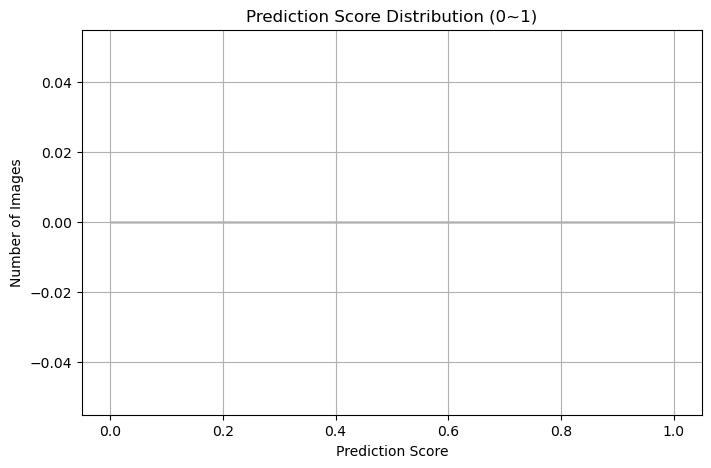

In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv
import matplotlib.pyplot as plt

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (오늘 데이터)
test_dir = "./data/recent"

# 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행
surge = 0
drop = 0
predictions = []
prediction_scores = []  # 예측 점수 저장용

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)

    # 모델 예측
    batch_preds = model.predict(batch_images, verbose=0)

    for img_name, pred in zip(batch_names, batch_preds):
        score = pred[0]
        result = "surge_pattern" if score > 0.5 else "drop_pattern"
        surge += 1 if score > 0.5 else 0
        drop += 1 if score <= 0.5 else 0
        predictions.append([img_name, result])
        prediction_scores.append(score)  # 점수 저장

# 결과 출력
print(f"상승 패턴: {surge}개")
print(f"하락 패턴: {drop}개")

# CSV 저장
output_csv = "today_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])
    writer.writerows(predictions)

print(f"예측 결과가 '{output_csv}'에 저장되었습니다!")

#시각화
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tqdm import tqdm

# ✅ 모델 불러오기
model = load_model("pattern_classification_model.h5")

# ✅ 테스트 이미지 폴더 경로
test_dir = "./data/test_patterns"

# ✅ 이미지 목록 불러오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# ✅ 예측 결과 저장
prediction_scores = []

# ✅ tqdm으로 예측 진행 상황 표시
for img_file in tqdm(image_files, desc="예측 진행 중"):
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array, verbose=0)
    prediction_scores.append(pred[0][0])

# ✅ 시각화
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 186.2 kB/s eta 0:03:32
   ---------------------------------------- 0.0/39.5 MB 163.4 kB/s eta 0:04:02
   ---------------------------------------- 0.1/39.5 MB 217.9 kB/s eta 0:03:01
   ---------------------------------------- 0.1/39.5 MB 308.0 kB/s eta 0:02:08
   ---------------------------------------- 0.1/39.5 MB 343.4 kB/s eta 0:01:55
   ---------------------------------------- 0.2/39.5 MB 382.3 kB/s eta 0:01:43
   ---------------------------------

Functional 모델 재구성 완료
 마지막 Conv 레이어: conv2d_17
📊 예측 score: 0.3577
하락 패턴으로 분류되었습니다!


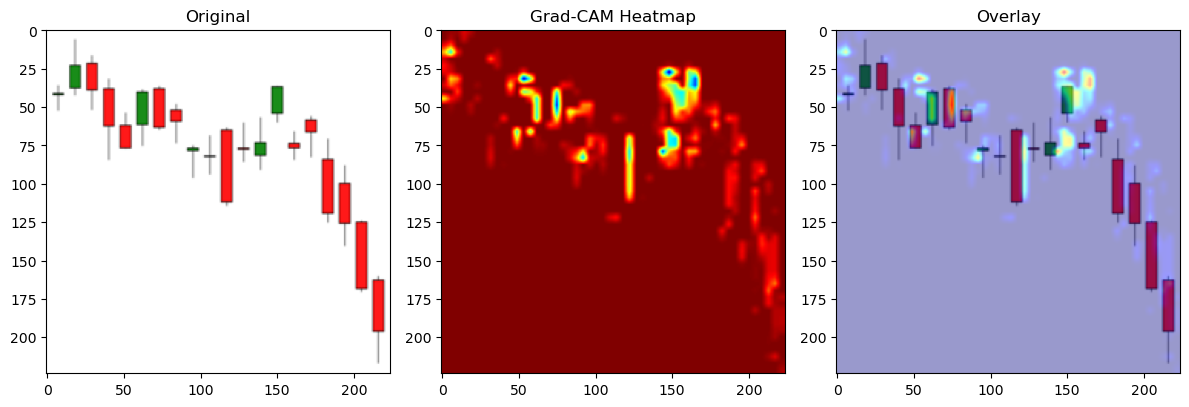

In [29]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 학습된 Sequential 모델 로드
seq_model = tf.keras.models.load_model("pattern_classification_model.h5")

# Functional 모델로 변환 (가중치 복사 포함)
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in seq_model.layers:
    cloned_layer = tf.keras.models.clone_model(layer)
    cloned_layer.set_weights(layer.get_weights())  # 가중치 복사!
    x = cloned_layer(x)
functional_model = tf.keras.Model(inputs=inputs, outputs=x)
print("Functional 모델 재구성 완료")

# 마지막 Conv 레이어 탐색
last_conv_layer_name = next(
    layer.name for layer in reversed(functional_model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)
print(f" 마지막 Conv 레이어: {last_conv_layer_name}")

# Grad-CAM 함수
def apply_gradcam(img_path, model, last_conv_layer_name):
    # 이미지 전처리
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Grad-CAM 서브모델 구성
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Gradient 계산
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array, training=False)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # 예측 결과 출력
    score = predictions[0][0].numpy()
    print(f"📊 예측 score: {score:.4f}")
    if score > 0.5:
        print("상승 패턴으로 분류되었습니다!")
    else:
        print("하락 패턴으로 분류되었습니다!")

    # Heatmap 계산
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8  # 안정성 확보

    # 시각화
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)

    # 출력
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

# 5️⃣ 실행
test_img_path = "./data/A_2024-04-18.png"  # 테스트할 이미지 경로
apply_gradcam(test_img_path, functional_model, last_conv_layer_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


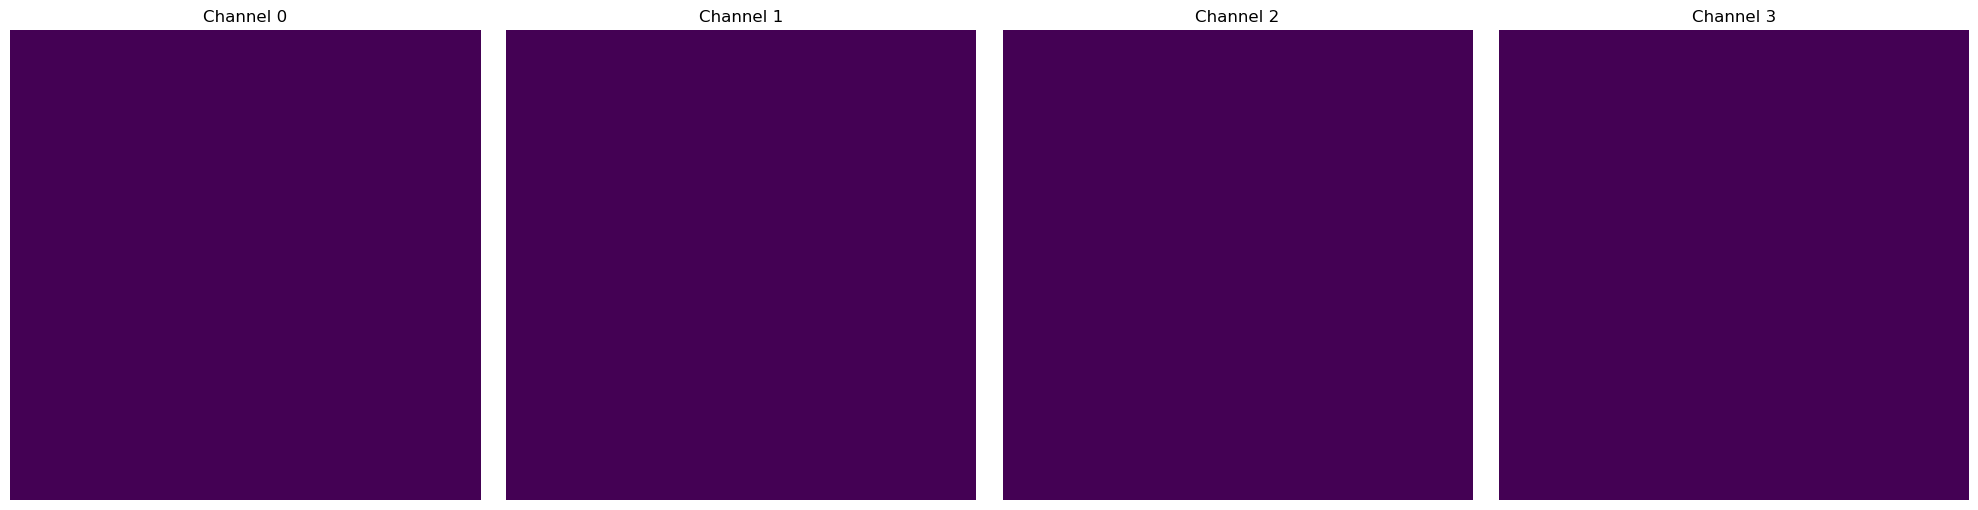

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트 이미지 경로
img_path = "./data/A_2024-04-18.png"

# 이미지 전처리
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 마지막 Conv 레이어 찾기
last_conv_layer_name = next(
    layer.name for layer in reversed(model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)

# 해당 Conv 레이어 출력만 따로 추출하는 모델
activation_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(last_conv_layer_name).output
)

# 활성화 맵 추출
activations = activation_model.predict(img_array)

# 앞의 4개 채널만 시각화
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax = axes[i]
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.set_title(f"Channel {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()